# Support Vector Machines (SVM) – Theory

---

## 1. Definition
Support Vector Machines (SVM) are **supervised machine learning algorithms** used for both **classification** and **regression** tasks.  
They work by finding the **optimal hyperplane** that best separates the classes in the dataset.

---

## 2. Key Idea
- SVM tries to maximize the **margin** between the classes.  
- The **margin** is the distance between the separating hyperplane and the closest data points (called **support vectors**).  
- In simple terms, SVM finds the "widest possible gap" between different classes and places the decision boundary in the middle.

---

## 3. Types of SVM
- **Linear SVM**: When data is linearly separable.  
- **Non-linear SVM**: Uses the **kernel trick** to project data into higher dimensions where it becomes separable.  
  - Common kernels:  
    - Linear  
    - Polynomial  
    - Radial Basis Function (RBF)  
    - Sigmoid  

---

## 4. Applications
- Text classification (spam or not spam)  
- Image recognition  
- Bioinformatics (protein classification, gene expression)  
- Handwriting recognition  

---

## 5. Advantages
- Effective in **high-dimensional spaces**.  
- Works well when there is a clear margin of separation.  
- Uses a subset of data points (support vectors), so it’s **memory efficient**.  

---

## 6. Limitations
- Not ideal for very large datasets (training can be slow).  
- Performance depends on proper choice of **kernel** and **regularization parameters**.  
- Less effective when classes overlap significantly.  

---

## 7. Model Training
- For classification, SVM solves an **optimization problem** to maximize the margin.  
- For regression (Support Vector Regression, SVR), it tries to fit the data within a margin of tolerance (epsilon).  
- Implemented in `scikit-learn` via:  
  - `SVC` (Support Vector Classifier)  
  - `SVR` (Support Vector Regressor)  


SVM Accuracy: 1.0000

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



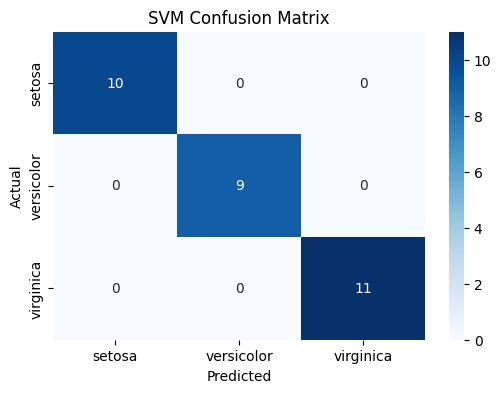

In [1]:
# ==============================
# Support Vector Machine (SVM) Classifier
# ==============================

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load dataset (Iris dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# 2. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 3. Train SVM Classifier
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  # RBF kernel
svm_model.fit(X_train, y_train)

# 4. Predictions
y_pred = svm_model.predict(X_test)

# 5. Accuracy & Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"SVM Accuracy: {acc:.4f}\n")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# 6. Visualization: Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()
